In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'data/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#full nulls
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].value_counts().index[0], inplace=True)

In [5]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0]
    else:
        return 'No title in Name'

df['Title'] = df['Name'].apply(get_title)

df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [6]:
df['Sex'].replace(('male', 'female'), (0,1), inplace=True)
df['Embarked'].replace(('S', 'C', 'Q'), (0,1,2), inplace=True)

df.drop('Title', axis=1, inplace=True)

In [12]:
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


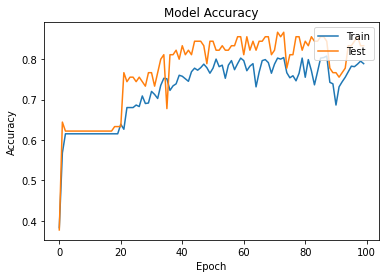

In [23]:
#first pass attempt - unoptimized

from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(7,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_train = model.fit(X, y, epochs=100, batch_size=50, verbose=0, validation_split=0.1)

plt.plot(model_train.history['accuracy'], label='Train')
plt.plot(model_train.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

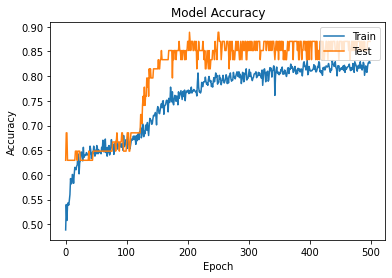

In [26]:
#optimized version - more layers, more nodes per layer, added dropout layers, more epochs, lowered validation split

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(7,)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_train = model.fit(X, y, epochs=500, batch_size=50, verbose=0, validation_split=0.06)

plt.plot(model_train.history['accuracy'], label='Train')
plt.plot(model_train.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [27]:
#saving our model for django

model.save('titanic_NN.h5')

In [34]:
#using the saved model
from keras.models import load_model

saved_model = load_model('titanic_NN.h5')

#format of input that would work with model
x_example = np.array([[1, 0, 30, 2, 2, 60, 1]])

#run prediction on array
prediction_num = saved_model.predict(x_example)

if prediction_num <0.5:
    prediction = 'Not Survived'
else:
    prediction = 'Survived'

print(prediction)


1/1 [==============================] - 0s 44ms/step
Not Survived


(60000, 28, 28)
(10000, 28, 28)


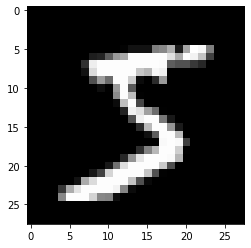

In [48]:
#Image classification
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist

#load in test data from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

plt.imshow(X_train[0], cmap='gray')

In [49]:
#reshape data - 28 * 28 for the image dimensions taken from the X_train shape
reshape = 28*28

X_train = X_train.reshape(60000, reshape)
X_test = X_test.reshape(10000, reshape)

#get datatypes to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [50]:
#Normalize data between 0-1 - divide all values by 255 since pixels are always between 0 and 255
X_train = X_train/255
X_test = X_test/255

In [51]:
#turn targets into categories - one hot encoding

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [56]:
#optimized version - more layers, more nodes per layer, added dropout layers, more epochs, lowered validation split

model_img = Sequential()
model_img.add(Dense(10, activation='relu', input_shape=(reshape,)))
model_img.add(Dense(10, activation='relu'))
model_img.add(Activation('softmax'))

model_img.summary()



Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 10)                7850      
                                                                 
 dense_66 (Dense)            (None, 10)                110       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
570/570 [==============================] - 1s 763us/step - loss: 1.8349 - accuracy: 0.4343 - val_loss: 1.3790 - val_accuracy: 0.6147
Epoch 2/50
570/570 [==============================] - 0s 633us/step - loss: 1.2896 - accuracy: 0.6187 - val_loss: 1.0974 - val_accuracy: 0.6860
Epoch 3/50
570/570 [==============================] - 0s 636us/step - loss: 1.1064 - accuracy: 0.6661 - val_loss: 0.8600 - val_accuracy: 0.7600
Epoch 4/50
570/570 [==============================] - 0s 635us/step - loss: 0.7704 - accuracy: 0.7874 - val_loss: 0.4648 - val_accuracy: 0.9010
Epoch 5/50
570/570 [==============================] - 0s 640us/step - loss: 0.4909 - accuracy: 0.8725 - val_loss: 0.3366 - val_accuracy: 0.9200
Epoch 6/50
570/570 [==============================] - 0s 640us/step - loss: 0.4190 - accuracy: 0.8861 - val_loss: 0.2980 - val_accuracy: 0.9263
Epoch 7/50
570/570 [==============================] - 0s 636us/step - loss: 0.3854 - accuracy: 0.8938 - val_loss: 0.2765 - val_accuracy:

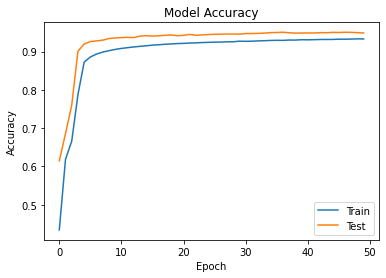

In [57]:
model_img.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
model_train_img=model_img.fit(X_train, y_train, batch_size=100, epochs=50, verbose=1, validation_split=0.05)

plt.plot(model_train_img.history['accuracy'], label='Train')
plt.plot(model_train_img.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [59]:
score = model_img.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {score[1]}")

Test accuracy: 0.9334999918937683


In [87]:
#CNN
from PIL import Image
from keras.utils import to_categorical
import os
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Images have been loaded in
Images have been loaded in


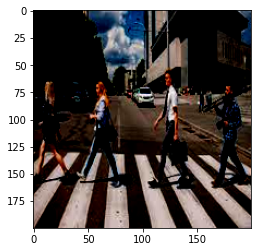

[1. 0.]


In [89]:
#bring in images

#image data shape (number of images, width, height, rgb) - images need to be resized to be the same
X =[] # for images
y =[] # for categories

folder_ped = './images/pedestrian/'
folder_road = './images/road/'

#mapping the image results to numbers
name_encode = {'pedestrian':0, 'road':1}

def images_to_array(folder, name):
    for image in os.listdir(folder):
        loaded_image = Image.open(os.path.join(folder, image))
        resize_image = Image.Image.resize(loaded_image, [200,200])
        image_array = np.array(resize_image)
        X.append(image_array)
        y.append(name_encode[name])

        #augmenting data by artificially adding images
        image_flipped = cv2.flip(image_array, 1)
        X.append(image_flipped)
        y.append(name_encode[name])

        image_blurred = cv2.blur(image_array, (2,2))
        X.append(image_blurred)
        y.append(name_encode[name])

        image_flipped_blurred = cv2.blur(image_flipped, (2,2))
        X.append(image_flipped_blurred)
        y.append(name_encode[name])
    
    print('Images have been loaded in')

def show_image(index):
    plt.imshow(X[index])
    plt.show()
    print(y[index])

images_to_array(folder_ped, 'pedestrian')
images_to_array(folder_road, 'road')

#get y values to categorical
y = to_categorical(y, num_classes=2)

#get x values into array - get numbers between -1 and 1
X = np.array(X)
X = (X-127.5)/127.5

show_image(5)

In [238]:
#create architecture for CNN

from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.models import Sequential

model_cimg = Sequential()
#32 = number of filters, (5,5) = kernal size, padding = for 0 padding
model_cimg.add(Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(200, 200, 3)))
model_cimg.add(MaxPool2D(pool_size=(2,2)))
model_cimg.add(Conv2D(100, (5,5), padding='same', activation='relu'))
model_cimg.add(MaxPool2D(pool_size=(2,2)))
model_cimg.add(Conv2D(300, (5,5), padding='same', activation='relu'))
model_cimg.add(Dropout(rate=0.3))
model_cimg.add(MaxPool2D(pool_size=(2,2)))
model_cimg.add(Conv2D(300, (5,5), padding='same', activation='relu'))
model_cimg.add(MaxPool2D(pool_size=(2,2)))
model_cimg.add(Conv2D(100, (5,5), padding='same', activation='relu'))
model_cimg.add(BatchNormalization())
model_cimg.add(MaxPool2D(pool_size=(2,2)))
model_cimg.add(Flatten())
model_cimg.add(Dense(124))
model_cimg.add(Activation('relu'))
model_cimg.add(Dense(2))
model_cimg.add(Activation('sigmoid'))

model_cimg.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d_86 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 100, 100, 100)     80100     
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 50, 50, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 50, 50, 300)       750300    
                                                                 
 dropout_31 (Dropout)        (None, 50, 50, 300)     

In [239]:
#Split dataset up
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Epoch 1/50
8/8 [==============================] - 5s 541ms/step - loss: 0.7072 - accuracy: 0.7500 - val_loss: 4.3876 - val_accuracy: 0.7500
Epoch 2/50
8/8 [==============================] - 4s 527ms/step - loss: 0.2151 - accuracy: 0.9167 - val_loss: 4.6860 - val_accuracy: 0.6250
Epoch 3/50
8/8 [==============================] - 4s 528ms/step - loss: 0.0795 - accuracy: 0.9722 - val_loss: 4.5233 - val_accuracy: 0.6250
Epoch 4/50
8/8 [==============================] - 4s 525ms/step - loss: 0.2999 - accuracy: 0.9306 - val_loss: 3.4851 - val_accuracy: 0.6250
Epoch 5/50
8/8 [==============================] - 4s 524ms/step - loss: 0.1071 - accuracy: 0.9722 - val_loss: 0.4653 - val_accuracy: 0.8750
Epoch 6/50
8/8 [==============================] - 4s 528ms/step - loss: 0.0212 - accuracy: 0.9861 - val_loss: 1.3507 - val_accuracy: 0.6250
Epoch 7/50
8/8 [==============================] - 4s 525ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.8207 - val_accuracy: 0.6250
Epoch 8/50
8/8 [====

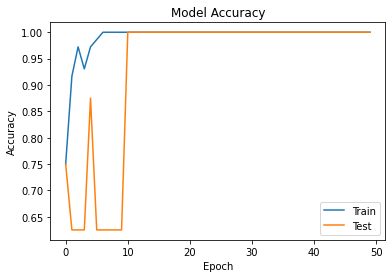

In [240]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model_cimg.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
h = model_cimg.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(X_test, y_test))
model_cimg.save('road_pedestrian_CNN.h5')

plt.plot(h.history['accuracy'], label='Train')
plt.plot(h.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()



1/1 [==============================] - 0s 71ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1]


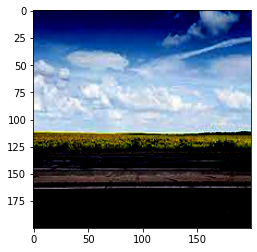

In [244]:
# run predictions

from keras.models import load_model

model_loaded_cimg = load_model('road_pedestrian_CNN.h5')

#predictions on images we have for testing
def prediction_current_images(index_number):
    #normalize the selected image, resize image
    img = (np.array(X[index_number]) - 127.5)/127.5
    img = img.reshape(1, 200, 200, 3)

    predict_x = model_loaded_cimg.predict(img)
    prediction=np.argmax(predict_x,axis=1)
    
    print(prediction)

    plt.imshow(X[index_number])
    plt.show

prediction_current_images(60)

1/1 [==============================] - 0s 70ms/step
[0]


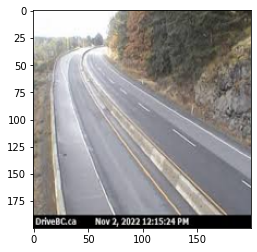

In [245]:
# run predictions - new images

from keras.models import load_model

model_loaded_cimg = load_model('road_pedestrian_CNN.h5')

#predictions on new images
def prediction_current_images(image_path):
    img_loaded = Image.open(image_path)
    img_loaded_resized = Image.Image.resize(img_loaded, (200,200))

    #normalize the selected image, resize image
    img = (np.array(img_loaded_resized) - 127.5)/127.5
    img = img.reshape(1, 200, 200, 3)

    predict_x = model_loaded_cimg.predict(img)
    prediction=np.argmax(predict_x,axis=1)
    
    print(prediction)

    plt.imshow(img_loaded_resized)
    plt.show

prediction_current_images('./images/test_image.jpg')

In [246]:
#CNN - multiple categories
from PIL import Image
from keras.utils import to_categorical
import os
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Images have been loaded in
Images have been loaded in
Images have been loaded in


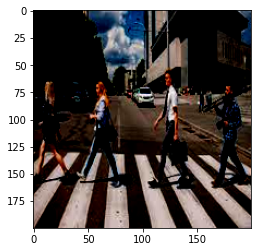

[1. 0. 0.]


In [249]:
#bring in images - multiple categories

#image data shape (number of images, width, height, rgb) - images need to be resized to be the same
X =[] # for images
y =[] # for categories

folder_ped = './images/pedestrian/'
folder_road = './images/road/'
folder_car = './images/cars/'

#mapping the image results to numbers
name_encode = {'pedestrian':0, 'road':1, 'car':2}

def images_to_array(folder, name):
    for image in os.listdir(folder):
        loaded_image = Image.open(os.path.join(folder, image))
        resize_image = Image.Image.resize(loaded_image, [200,200])
        image_array = np.array(resize_image)
        X.append(image_array)
        y.append(name_encode[name])

        #augmenting data by artificially adding images
        image_flipped = cv2.flip(image_array, 1)
        X.append(image_flipped)
        y.append(name_encode[name])

        image_blurred = cv2.blur(image_array, (2,2))
        X.append(image_blurred)
        y.append(name_encode[name])

        image_flipped_blurred = cv2.blur(image_flipped, (2,2))
        X.append(image_flipped_blurred)
        y.append(name_encode[name])
    
    print('Images have been loaded in')

def show_image(index):
    plt.imshow(X[index])
    plt.show()
    print(y[index])

images_to_array(folder_ped, 'pedestrian')
images_to_array(folder_road, 'road')
images_to_array(folder_car, 'car')

#get y values to categorical
y = to_categorical(y, num_classes=3)

#get x values into array - get numbers between -1 and 1
X = np.array(X)
X = (X-127.5)/127.5

show_image(5)

In [250]:
#create architecture for CNN - multiple categories

from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.models import Sequential

model_cimg = Sequential()
#32 = number of filters, (5,5) = kernal size, padding = for 0 padding
model_cimg.add(Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(200, 200, 3)))
model_cimg.add(MaxPool2D(pool_size=(2,2)))
model_cimg.add(Conv2D(100, (5,5), padding='same', activation='relu'))
model_cimg.add(MaxPool2D(pool_size=(2,2)))
model_cimg.add(Conv2D(300, (5,5), padding='same', activation='relu'))
model_cimg.add(Dropout(rate=0.3))
model_cimg.add(MaxPool2D(pool_size=(2,2)))
model_cimg.add(Conv2D(300, (5,5), padding='same', activation='relu'))
model_cimg.add(MaxPool2D(pool_size=(2,2)))
model_cimg.add(Conv2D(100, (5,5), padding='same', activation='relu'))
model_cimg.add(BatchNormalization())
model_cimg.add(MaxPool2D(pool_size=(2,2)))
model_cimg.add(Flatten())
model_cimg.add(Dense(124))
model_cimg.add(Activation('relu'))
model_cimg.add(Dense(3))
#softmax for multiple categories - will output the probabilities for each category
model_cimg.add(Activation('softmax'))

model_cimg.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 100, 100, 100)     80100     
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 50, 50, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 50, 50, 300)       750300    
                                                                 
 dropout_32 (Dropout)        (None, 50, 50, 300)     

In [252]:
#Split dataset up
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Epoch 1/50
11/11 [==============================] - 7s 617ms/step - loss: 1.3462 - accuracy: 0.6389 - val_loss: 26.2571 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - 6s 575ms/step - loss: 0.3477 - accuracy: 0.8519 - val_loss: 25.3085 - val_accuracy: 0.5000
Epoch 3/50
11/11 [==============================] - 6s 588ms/step - loss: 0.2287 - accuracy: 0.9167 - val_loss: 7.7147 - val_accuracy: 0.5000
Epoch 4/50
11/11 [==============================] - 6s 578ms/step - loss: 0.1158 - accuracy: 0.9444 - val_loss: 3.1292 - val_accuracy: 0.6667
Epoch 5/50
11/11 [==============================] - 6s 567ms/step - loss: 0.0435 - accuracy: 0.9815 - val_loss: 4.3760 - val_accuracy: 0.5833
Epoch 6/50
11/11 [==============================] - 6s 567ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 3.2303 - val_accuracy: 0.5833
Epoch 7/50
11/11 [==============================] - 6s 571ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.9624 - val_accuracy: 0.6667
Epoc

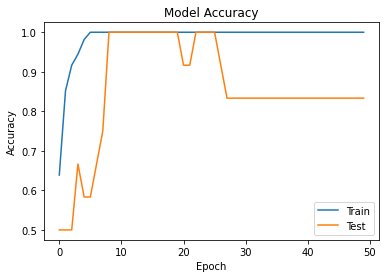

In [253]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model_cimg.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
h = model_cimg.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(X_test, y_test))
model_cimg.save('road_pedestrian_CNN.h5')

plt.plot(h.history['accuracy'], label='Train')
plt.plot(h.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 70ms/step
[0]


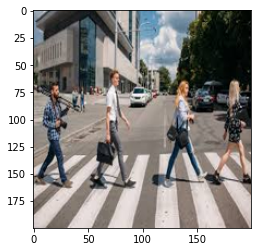

In [265]:
# run predictions - new images - multiple classes

from keras.models import load_model

model_loaded_cimg = load_model('road_pedestrian_CNN.h5')

#predictions on new images
def prediction_current_images(image_path):
    img_loaded = Image.open(image_path)
    img_loaded_resized = Image.Image.resize(img_loaded, (200,200))

    #normalize the selected image, resize image
    img = (np.array(img_loaded_resized) - 127.5)/127.5
    img = img.reshape(1, 200, 200, 3)

    predict_x = model_loaded_cimg.predict(img)
    prediction=np.argmax(predict_x,axis=1)
    
    print(prediction)

    plt.imshow(img_loaded_resized)
    plt.show

prediction_current_images('./images/pedestrian/10.jpg')